In [4]:
import pandas as pd

In [5]:
#atribuindo variáveis para os arquivos em uso
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")


In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [ ]:
df3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [ ]:
df4.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7


In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [7]:
#concatenando bases de dados
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [ ]:
#pegando amostra 
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
135,Natal,2019-01-02,9.95,1037,3
13,Aracaju,2018-01-01,43.45,1522,10
72,Aracaju,2018-01-01,168.95,1523,7
21,Natal,2019-02-08,679.00,853,2
33,Recife,2019-01-01,32.33,982,1


In [17]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [18]:
df["LojaID"] = df["LojaID"].astype("object")

In [19]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID     object
Qtde        int64
dtype: object

In [20]:
#somando os nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [21]:
df["Vendas"].fillna(df["Vendas"].mean() , inplace=True)

In [22]:
#criando colunas novas
df["Receita"] = df["Vendas"].mul(df["Qtde"])


In [23]:
df["Receita/vendas"] = df["Receita"] / df["Vendas"]

In [24]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,1514764800000000000,142.00,1520,1,142.00,1.0
1,Aracaju,1514764800000000000,14.21,1522,6,85.26,6.0
2,Aracaju,1514764800000000000,71.55,1520,1,71.55,1.0
3,Aracaju,1514764800000000000,3.01,1521,7,21.07,7.0
4,Aracaju,1514764800000000000,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,1546473600000000000,41.84,1034,1,41.84,1.0
236,Salvador,1546473600000000000,126.29,1035,3,378.87,3.0
237,Salvador,1546473600000000000,38.06,1036,3,114.18,3.0
238,Salvador,1546473600000000000,139.64,1035,1,139.64,1.0


In [25]:
df["Receita"].max()

3544.0

In [26]:
df["Receita"].min()

3.34

In [27]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,1552867200000000000,886.0,853,4,3544.0,4.0
51,Natal,1516492800000000000,859.0,852,4,3436.0,4.0
55,Natal,1546905600000000000,859.0,854,4,3436.0,4.0


In [28]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,1514764800000000000,3.34,1522,1,3.34,1.0
65,Recife,1546300800000000000,4.01,981,1,4.01,1.0
92,Natal,1546387200000000000,4.57,1035,1,4.57,1.0


In [29]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [30]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,1552867200000000000,886.0,853,4,3544.0,4.0
55,Natal,1546905600000000000,859.0,854,4,3436.0,4.0
51,Natal,1516492800000000000,859.0,852,4,3436.0,4.0
30,Natal,1538438400000000000,856.0,853,4,3424.0,4.0
41,Natal,1526774400000000000,835.0,852,4,3340.0,4.0
38,Natal,1519516800000000000,828.0,852,4,3312.0,4.0
10,Natal,1540598400000000000,828.0,852,4,3312.0,4.0
69,Natal,1553385600000000000,817.0,852,4,3268.0,4.0
62,Natal,1518220800000000000,793.0,854,4,3172.0,4.0
52,Natal,1524787200000000000,778.0,854,4,3112.0,4.0


In [ ]:
#convertendo data pra inteiro
df["Data"] = df["Data"].astype("int64")

In [31]:
#convertendo data para datetime
df["Data"] = pd.to_datetime(df["Data"])

In [32]:
#receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
#criando um nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [34]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019
42,Salvador,2019-01-01,44.28,1034,1,44.28,1.0,2019
103,Natal,2019-01-02,191.60,1034,1,191.60,1.0,2019
42,Aracaju,2018-01-01,40.00,1520,8,320.00,8.0,2018
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0,2019
10,Recife,2019-01-01,38.51,982,8,308.08,8.0,2019
64,Natal,2019-02-22,704.00,853,4,2816.00,4.0,2019
40,Recife,2019-02-13,36.22,983,6,217.32,6.0,2019
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019
215,Salvador,2019-01-02,203.84,1036,1,203.84,1.0,2019


In [35]:
df["Mês_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mês_venda,Dia_venda
165,Natal,2019-01-02,11.54,1037,1,11.54,1.0,2019,1,2
109,Aracaju,2018-01-01,51.64,1523,5,258.20,5.0,2018,1,1
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2
124,Natal,2019-01-02,44.82,1034,3,134.46,3.0,2019,1,2
162,Natal,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2


In [38]:
#achando a data mínima
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [39]:
#diferença da data mínima
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mês_venda,Dia_venda,Diferenca_dias
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1,365 days
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019,1,1,365 days
12,Natal,2019-02-02,709.00,853,3,2127.00,3.0,2019,2,2,397 days
114,Recife,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days


In [41]:
#criando coluna com trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mês_venda,Dia_venda,Diferenca_dias,Trimestre_venda
215,Salvador,2019-01-02,203.84,1036,1,203.84,1.0,2019,1,2,366 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
187,Salvador,2019-01-02,3.85,1035,3,11.55,3.0,2019,1,2,366 days,1


In [43]:
#filtrando as vendas de março 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [44]:
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mês_venda,Dia_venda,Diferenca_dias,Trimestre_venda
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2.0,2019,3,2,425 days,1
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1


In [45]:
df["LojaID"].value_counts(ascending=False) 

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

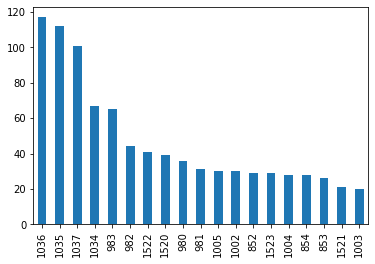

In [46]:
#Gráficos de Barras
df["LojaID"].value_counts(ascending=False).plot.bar() 

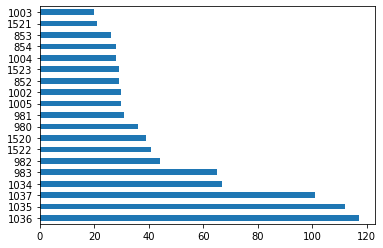

In [47]:
#Gráficos de Barras Horizontais
df["LojaID"].value_counts(ascending=False).plot.barh() 

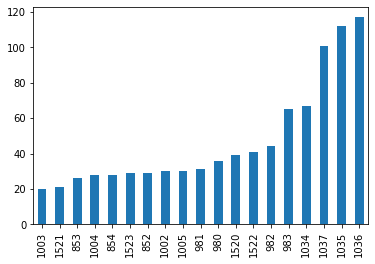

In [48]:
#Gráficos de Barras horizontais organizados
df["LojaID"].value_counts(ascending=True).plot.bar() 

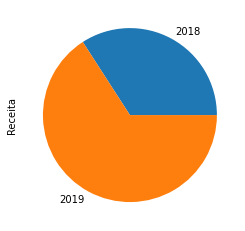

In [49]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie() 

In [51]:
#contador de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [52]:
#importando matplotlib
import matplotlib.pyplot as plt

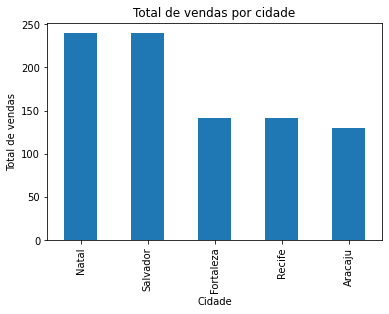

In [53]:
#personalizando o gráfico
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

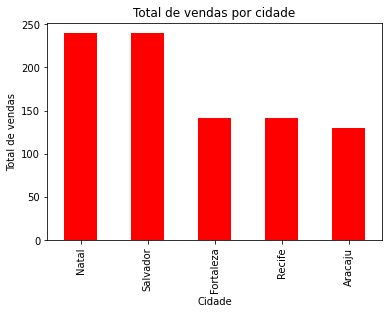

In [54]:
#mudando a cor do gráfico
#personalizando o gráfico
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

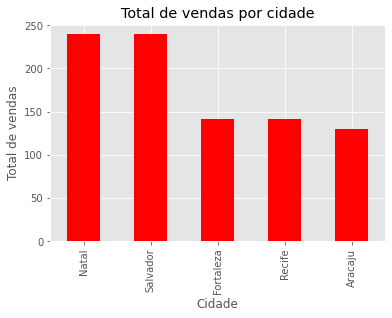

In [56]:
#alterando o estilo do gráfico
plt.style.use("ggplot")

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

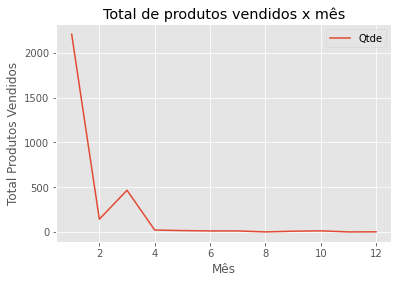

In [60]:
#personalizando o gráfico
df.groupby(df["Mês_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [62]:
#variável de df referente aos dados de 2019
df_2019= df[df["Ano_venda"] == 2019] 

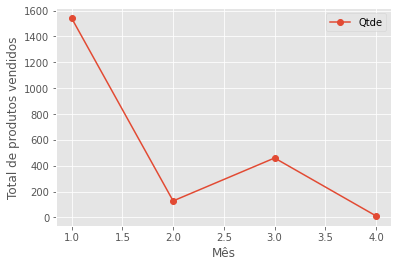

In [67]:
#total de vendas por mes de 2019
df_2019.groupby(df_2019["Mês_venda"])["Qtde"].sum().plot(marker= "o")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

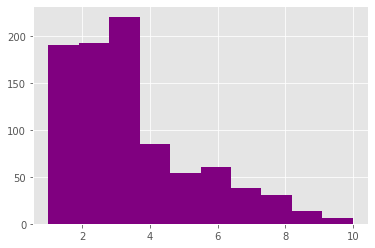

In [70]:
#plot de histograma
plt.hist(df["Qtde"], color="purple");

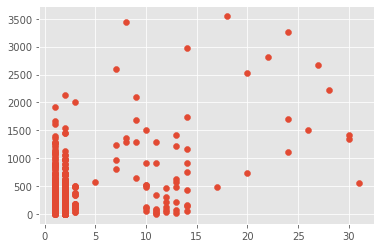

In [75]:
#gráfico de dispersão
plt.scatter(x = df_2019["Dia_venda"], y = df_2019["Receita"]);

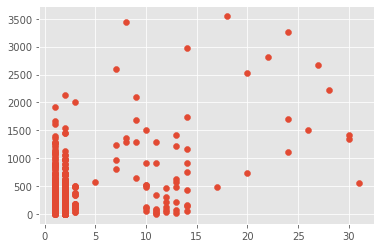

In [74]:
#salvando a imagem do gráfico
plt.scatter(x = df_2019["Dia_venda"], y = df_2019["Receita"]);
plt.savefig("Grafico_dispersão")